In [1]:
# Loading packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns #Samuel Norman Seaborn
from sklearn.preprocessing import scale, StandardScaler, PolynomialFeatures


import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, LeaveOneOut, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, \
classification_report, roc_curve, roc_auc_score, auc, RocCurveDisplay, mean_squared_error

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from functools import partial
from tqdm import tqdm
tqdm = partial(tqdm, position=0, leave=True)

%matplotlib inline
plt.style.use('seaborn-white')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# EDA

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
#eda
#correlation劃出個別圖，熱度圖，多變量分析，統計檢定
#outlier
#rescaling

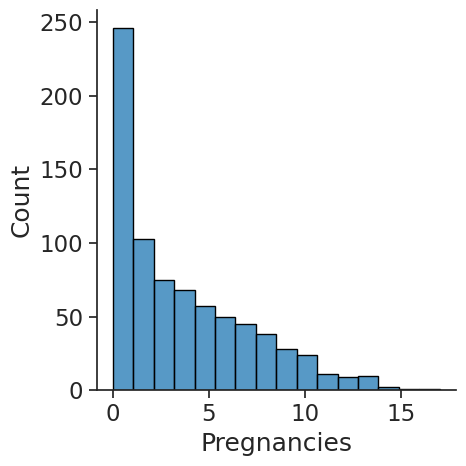

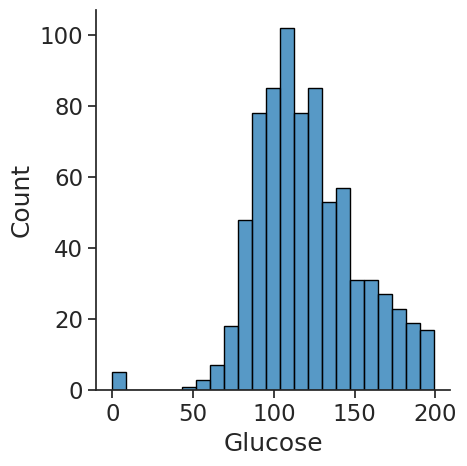

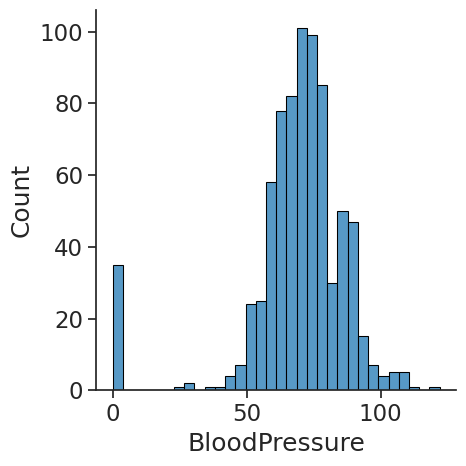

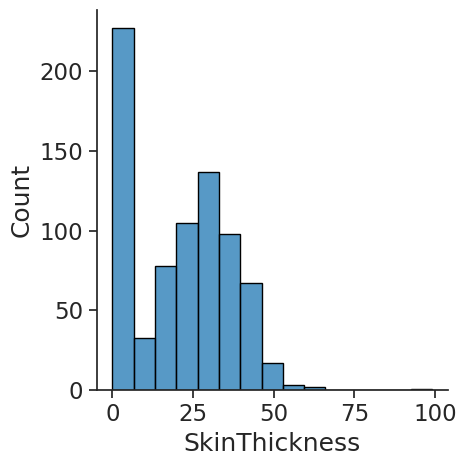

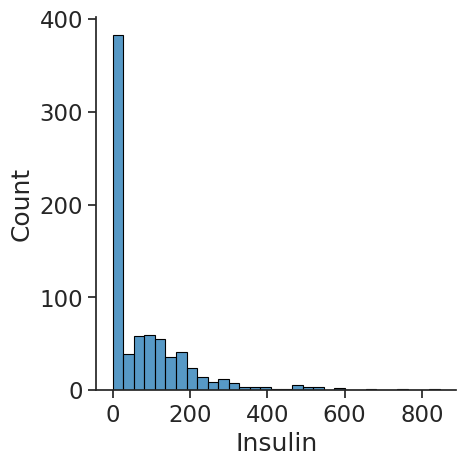

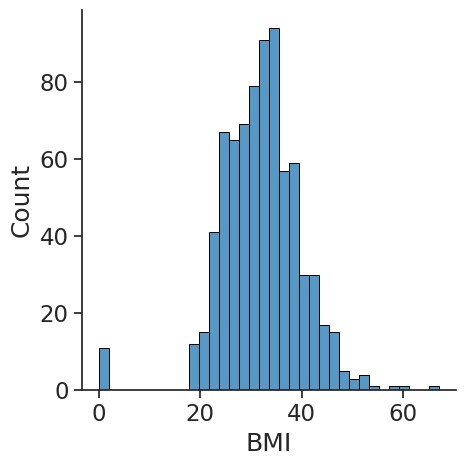

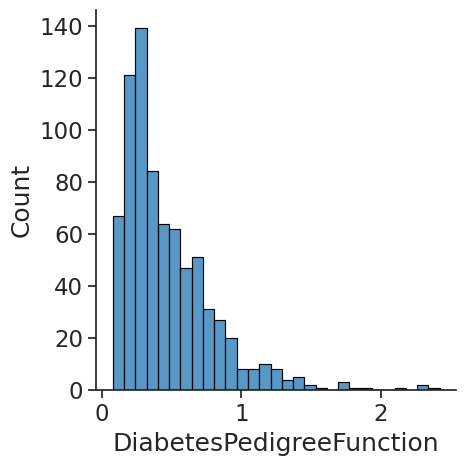

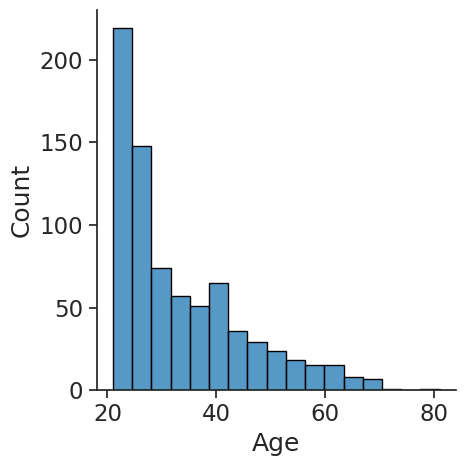

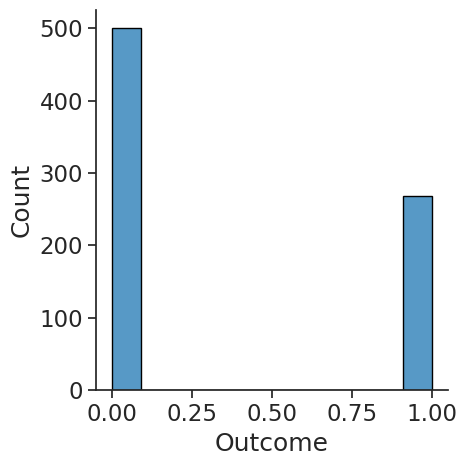

In [6]:
for i in df.columns :
    sns.displot(x=i, data = df)

<AxesSubplot:xlabel='Outcome', ylabel='count'>

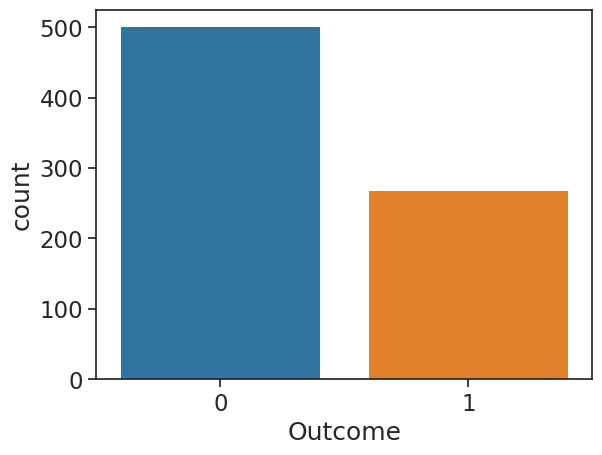

In [7]:
sns.countplot(x="Outcome", data = df)

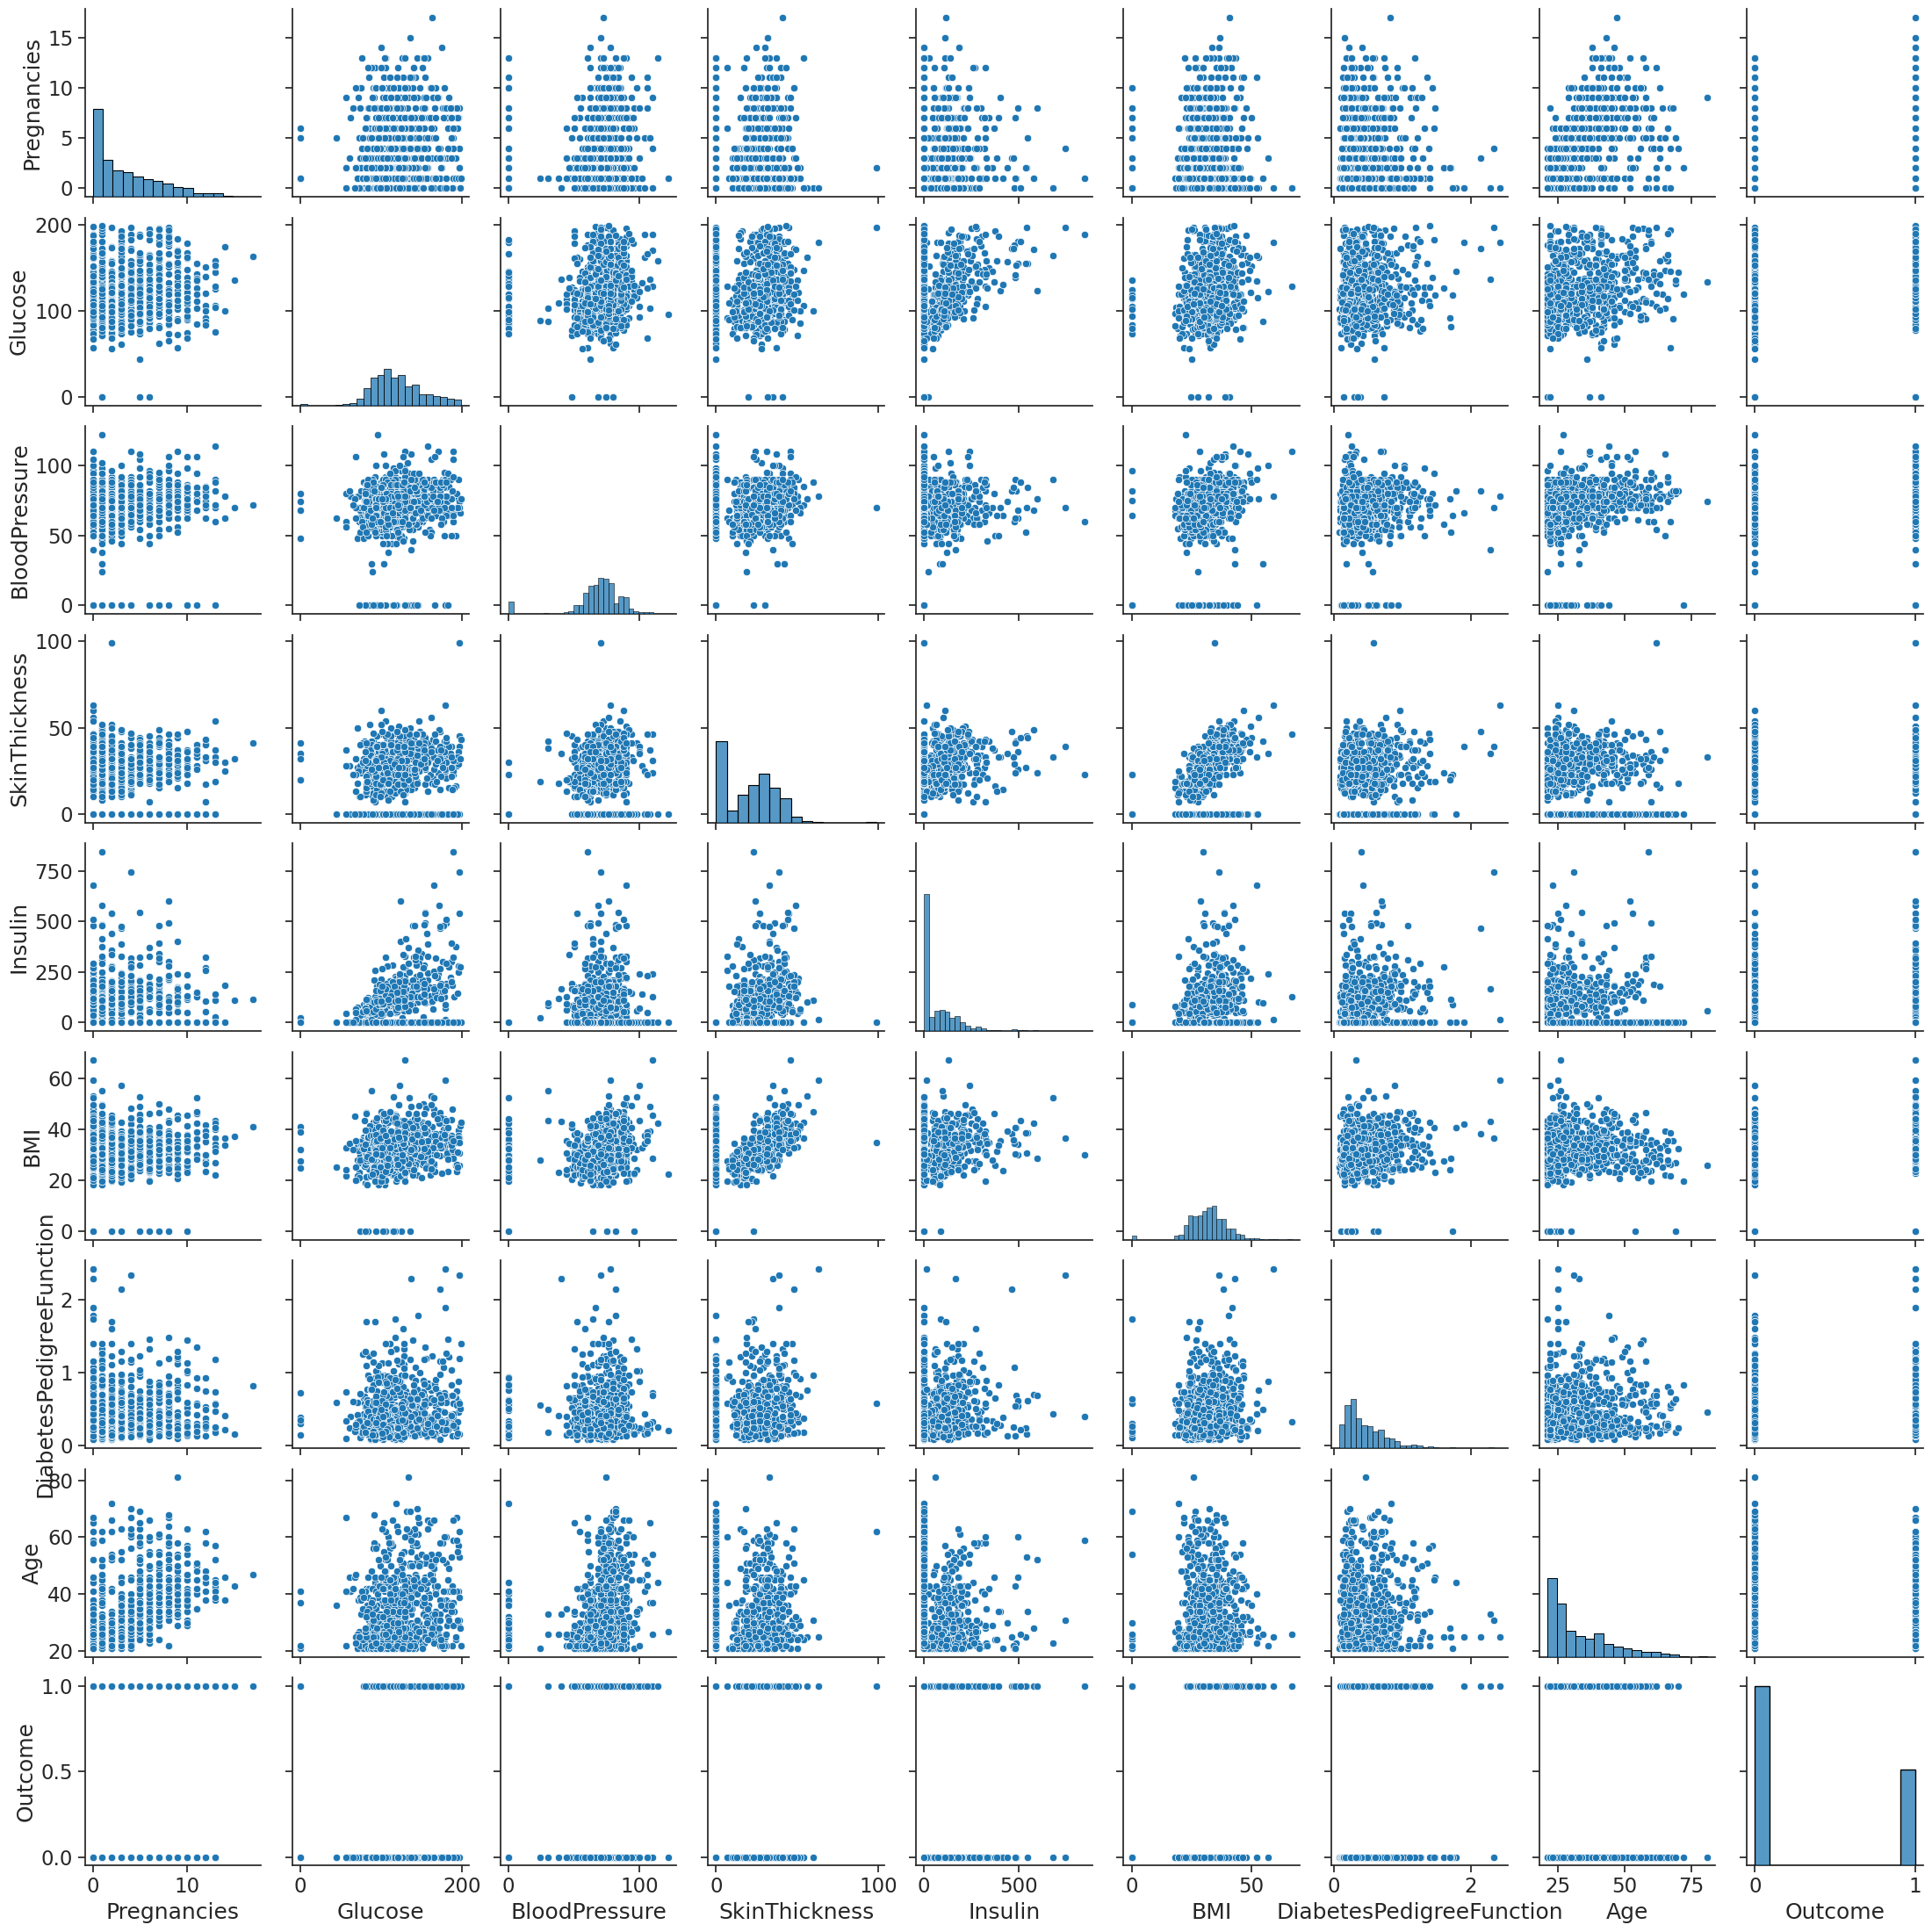

In [8]:
sns.pairplot(df)

<AxesSubplot:>

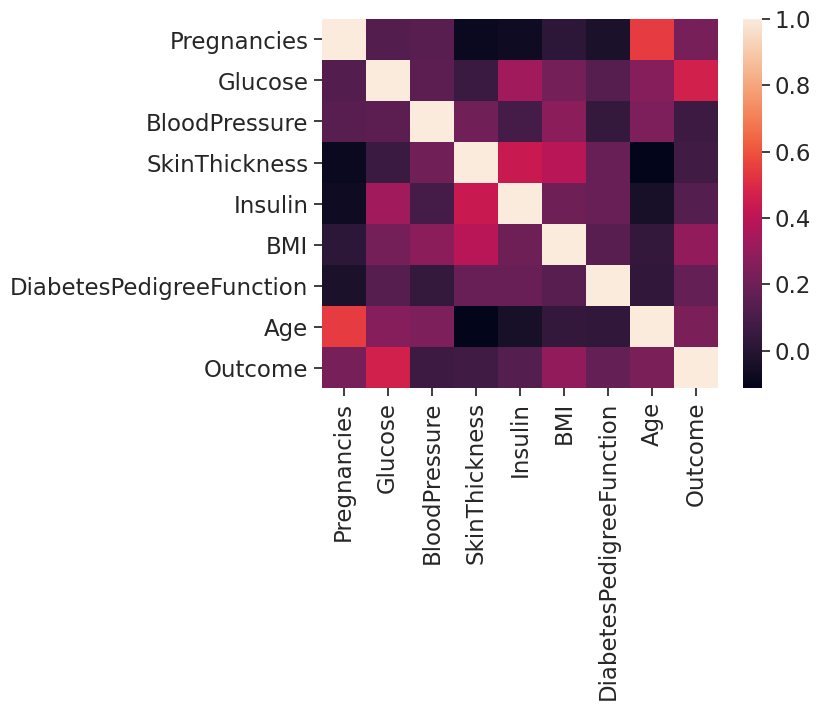

In [9]:
corr = df.corr()
sns.heatmap(corr)

# Preprocessing

## value completion

In [10]:
#Blood pressure, SkinThickness, Insulin , Glucose and BMI shouldnt be 0, need to something about that
for i in df.columns:
    print(i, df[df[i] == 0].count()[0])

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BMI 11
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [11]:
#fill bloodpressure, SkinThickness, BMI with mean
for i in ['BloodPressure', 'SkinThickness', 'BMI']:
    df[i] = df[i].replace(0, df[i].mean())

#fill Glucose, Insulin, with median 
for i in ['Glucose', 'Insulin']:
    df[i] = df[i].replace(0, df[i].median())
    
for i in df.columns:
    print(i, df[df[i] == 0].count()[0])

Pregnancies 111
Glucose 0
BloodPressure 0
SkinThickness 0
Insulin 0
BMI 0
DiabetesPedigreeFunction 0
Age 0
Outcome 500


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.254807,26.606479,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.115932,9.631241,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Modeling

In [13]:
#變數選擇
#模型比較
#metrics

In [59]:
# Outcome of diabetes is slightly imbalanced, maybe we can to some resampling.
print(sum(df['Outcome']==0))
print(sum(df['Outcome']==1))
print("Outcome ratio is almost 2 to 1")

500
268
Outcome ratio is almost 2 to 1


In [15]:
# Outcome of diabetes is slightly imbalanced, maybe we can to some resampling.
from imblearn.over_sampling import SMOTE

##　train_test splitting

### class imbalance

In [75]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

oversample = SMOTE(random_state=1)
X_train, y_train = oversample.fit_resample(X_train,y_train)
y_train = pd.Series(y_train)
y_train.value_counts()



0    338
1    338
Name: Outcome, dtype: int64

### rescaling

In [76]:
scaling = StandardScaler().fit(X_train)
X_train_transform = scaling.transform(X_train)
X_test_transform = scaling.transform(X_test)

## Logistic regression

In [77]:
X_train = pd.DataFrame(X_train_transform,columns = X_train.columns, index = X_train.index)
X_test = pd.DataFrame(X_test_transform, columns = X_test.columns, index=X_test.index)

In [78]:
all_columns = "+".join(df.columns.difference(["Outcome"]))
all_columns
formula = 'Outcome ~ ' + all_columns
print(formula)
type(formula)

Outcome ~ Age+BMI+BloodPressure+DiabetesPedigreeFunction+Glucose+Insulin+Pregnancies+SkinThickness


str

In [79]:
df2 = pd.concat([X_train, y_train], axis = 1)
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,-0.871361,-0.632030,-1.025795,2.094261,0.622688,0.380950,-0.235751,-0.861656,0
1,2.804397,-0.695674,-0.215099,-0.649287,-0.638328,0.188662,-0.741950,1.569321,0
2,0.047578,-0.504743,0.433458,1.447796,-0.638328,0.957814,-0.788249,0.353832,0
3,-0.565048,-0.186526,0.271319,0.047122,0.810772,0.440116,-0.025864,-0.688015,0
4,0.353891,-0.122882,0.109180,-0.649287,-0.638328,0.159080,-0.837634,0.353832,1


In [80]:
# logistic_regression = LogisticRegression(solver='newton-cg', C=1e42)
# logistic_regression.fit(X_train, y_train)
# logistic_regression.score(X_train, y_train)
logistic_regression = smf.glm(formula=formula,
                              data=df2, family=sm.families.Binomial())
result = logistic_regression.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  676
Model:                            GLM   Df Residuals:                      667
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -333.11
Date:                Fri, 30 Dec 2022   Deviance:                       666.23
Time:                        07:38:53   Pearson chi2:                     827.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3302
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [83]:
# training acc...
predictions = result.predict(X_train)
y_pred = [ 1 if x > 0.5 else 0 for x in predictions]
cm = confusion_matrix(y_train, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

print("AUC Score: ", roc_auc_score(y_train, y_pred) )

Accuracy:  0.7470414201183432
Sensitivity:  0.7218934911242604
Precision:  0.7601246105919003
False Positive Rate:  0.22781065088757396
AUC Score:  0.7470414201183433


Accuracy:  0.8031496062992126
Sensitivity:  0.7391304347826086
Precision:  0.723404255319149
False Positive Rate:  0.16049382716049382
AUC Score:  0.7893183038110574


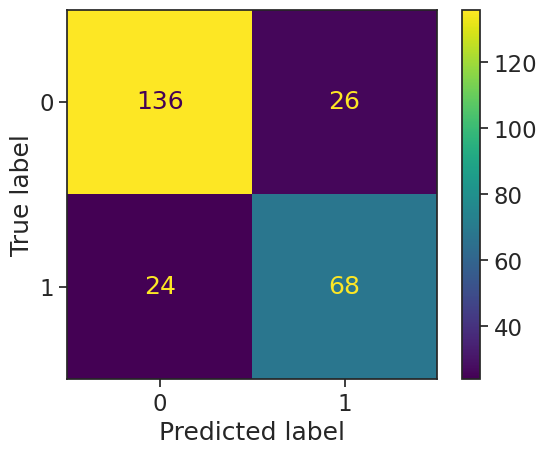

In [84]:
#testing
predictions = result.predict(X_test)
y_pred = [ 1 if x > 0.5 else 0 for x in predictions]
cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

print("AUC Score: ", roc_auc_score(y_test, y_pred) )
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

In [85]:
#print(classification_report(y_test, y_pred, digits=3))
#print(roc_auc_score(y_test,y_pred))

## Linear Discriminant Analysis

In [86]:
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [87]:
# training acc...
predictions = lda.predict(X_train)
y_pred = [ 1 if x > 0.5 else 0 for x in predictions]
cm = confusion_matrix(y_train, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

print("AUC Score: ", roc_auc_score(y_train, y_pred) )

Accuracy:  0.75
Sensitivity:  0.7189349112426036
Precision:  0.7665615141955836
False Positive Rate:  0.21893491124260356
AUC Score:  0.75


Accuracy:  0.7992125984251969
Sensitivity:  0.7282608695652174
Precision:  0.7204301075268817
False Positive Rate:  0.16049382716049382
AUC Score:  0.7838835212023617


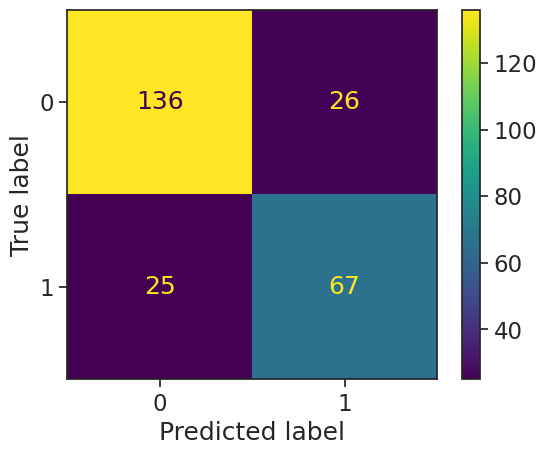

In [88]:
y_pred = lda.predict(X_test)
post = lda.predict_proba(X_test)
cm = confusion_matrix(y_test, y_pred)


TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
print("AUC Score: ", roc_auc_score(y_test, y_pred) )

ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

## Quadratic Discriminant Analysis

In [89]:
qda = QDA()
qda.fit(X_train,y_train)

QuadraticDiscriminantAnalysis()

In [90]:
# training acc...
predictions = qda.predict(X_train)
y_pred = [ 1 if x > 0.5 else 0 for x in predictions]
cm = confusion_matrix(y_train, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

print("AUC Score: ", roc_auc_score(y_train, y_pred) )

Accuracy:  0.735207100591716
Sensitivity:  0.665680473372781
Precision:  0.7731958762886598
False Positive Rate:  0.1952662721893491
AUC Score:  0.735207100591716


Accuracy:  0.7637795275590551
Sensitivity:  0.6630434782608695
Precision:  0.6777777777777778
False Positive Rate:  0.17901234567901234
AUC Score:  0.7420155662909286


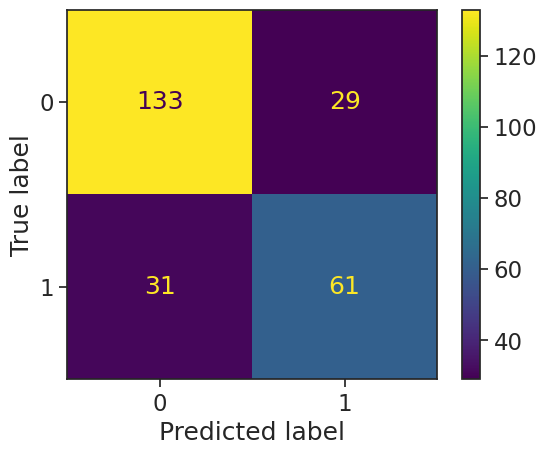

In [91]:
y_pred = qda.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
print("AUC Score: ", roc_auc_score(y_test, y_pred) )
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

## K-nearset neighbors

In [92]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [93]:
# training acc...
predictions = knn.predict(X_train)
y_pred = [ 1 if x > 0.5 else 0 for x in predictions]
cm = confusion_matrix(y_train, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

print("AUC Score: ", roc_auc_score(y_train, y_pred) )

Accuracy:  0.8195266272189349
Sensitivity:  0.8905325443786982
Precision:  0.7797927461139896
False Positive Rate:  0.2514792899408284
AUC Score:  0.8195266272189349


Accuracy:  0.7480314960629921
Sensitivity:  0.7608695652173914
Precision:  0.625
False Positive Rate:  0.25925925925925924
AUC Score:  0.750805152979066


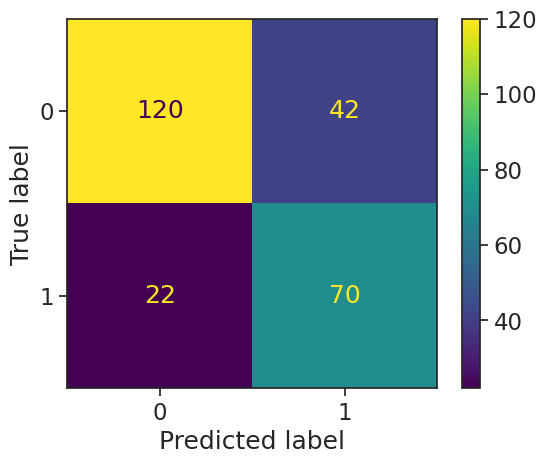

In [94]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
print("AUC Score: ", roc_auc_score(y_test, y_pred) )
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

### use 10-fold cv to decide K

In [95]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.871361,-0.632030,-1.025795,2.094261,0.622688,0.380950,-0.235751,-0.861656
1,2.804397,-0.695674,-0.215099,-0.649287,-0.638328,0.188662,-0.741950,1.569321
2,0.047578,-0.504743,0.433458,1.447796,-0.638328,0.957814,-0.788249,0.353832
3,-0.565048,-0.186526,0.271319,0.047122,0.810772,0.440116,-0.025864,-0.688015
4,0.353891,-0.122882,0.109180,-0.649287,-0.638328,0.159080,-0.837634,0.353832


In [96]:

# kf = KFold(n_splits=10, shuffle=True, random_state=1)
# cv_acc = []
# for i in tqdm(range(1,20)):
#     kfold_acc = []
#     for train_index, test_index in kf.split(X):
#         print(train_index, test_index)
#         X_train_cv, X_test_cv = X_train[train_index], X[test_index]
#         y_train_cv, y_test_cv = y_train[train_index], y[test_index]
        
#         knn = KNeighborsClassifier(n_neighbors= i)
#         y_pred = knn.fit(X_train_cv, y_train_cv).predict(X_test_cv)
        
#         kfold_acc.append(accuracy_score(y_test_cv,y_pred))
#     cv_acc.append(np.array(kfold_acc).mean())

## Decision Tree

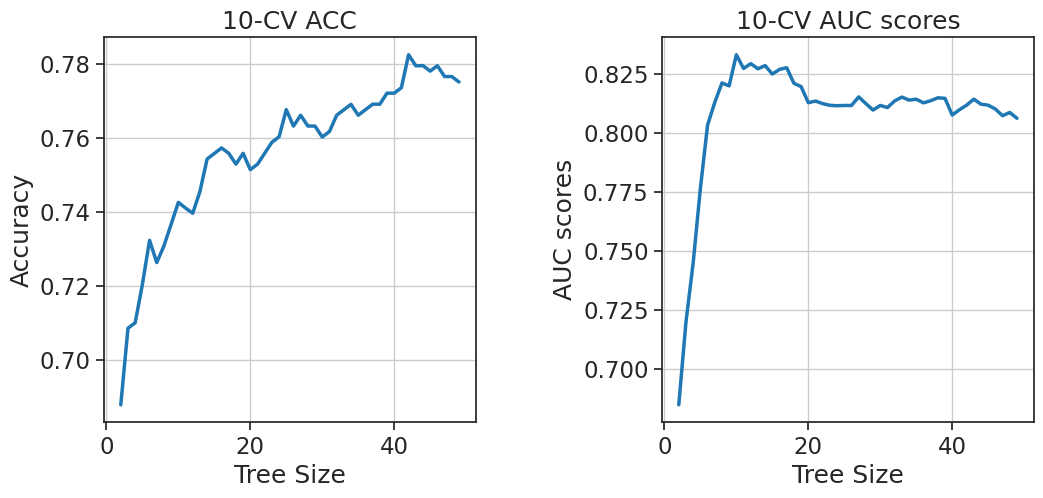

In [97]:
tree_sizes = range(2, 50)

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=1)

ACC_scores = []
AUC_scores = []

# 10-Fold CV for each tree size 
for size in tree_sizes:
    clf_tree = DecisionTreeClassifier(max_leaf_nodes=size, random_state=1, criterion='entropy')
    ACC_s = cross_val_score(clf_tree, X_train, y_train, cv=kf, scoring='accuracy')
    AUC_s = cross_val_score(clf_tree, X_train, y_train, cv=kf, scoring='roc_auc')
    ACC_scores.append(np.mean(ACC_s))
    AUC_scores.append(np.mean(AUC_s))
    
# plot CV-Accuracy and AUC socres w.r.t tree sizes 
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))          
fig.subplots_adjust(wspace=0.5)

ax1.plot(tree_sizes, ACC_scores)
ax1.set_title('10-CV ACC')
ax1.set_xlabel('Tree Size')
ax1.set_ylabel('Accuracy')
ax1.grid(True)

ax2.plot(tree_sizes, AUC_scores)
ax2.set_title('10-CV AUC scores')
ax2.set_xlabel('Tree Size')
ax2.set_ylabel('AUC scores')
ax2.grid(True)

In [98]:
leaf_node = np.array(AUC_scores).argmax()+1
leaf_node

9

In [99]:
clf_tree = DecisionTreeClassifier(max_leaf_nodes=leaf_node, random_state=1, criterion='entropy')
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=9, random_state=1)

In [100]:
# training acc...
predictions = clf_tree.predict(X_train)
y_pred = [ 1 if x > 0.5 else 0 for x in predictions]
cm = confusion_matrix(y_train, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

print("AUC Score: ", roc_auc_score(y_train, y_pred) )

Accuracy:  0.7633136094674556
Sensitivity:  0.7751479289940828
Precision:  0.7572254335260116
False Positive Rate:  0.2485207100591716
AUC Score:  0.7633136094674557


Accuracy:  0.7519685039370079
Sensitivity:  0.7608695652173914
Precision:  0.6306306306306306
False Positive Rate:  0.25308641975308643
AUC Score:  0.7538915727321525


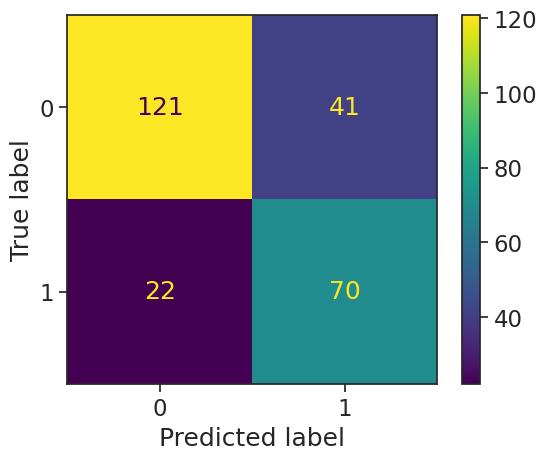

In [101]:


y_pred = clf_tree.predict(X_test)
y_pred_prob = clf_tree.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)     
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
print("AUC Score: ", roc_auc_score(y_test, y_pred) )

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

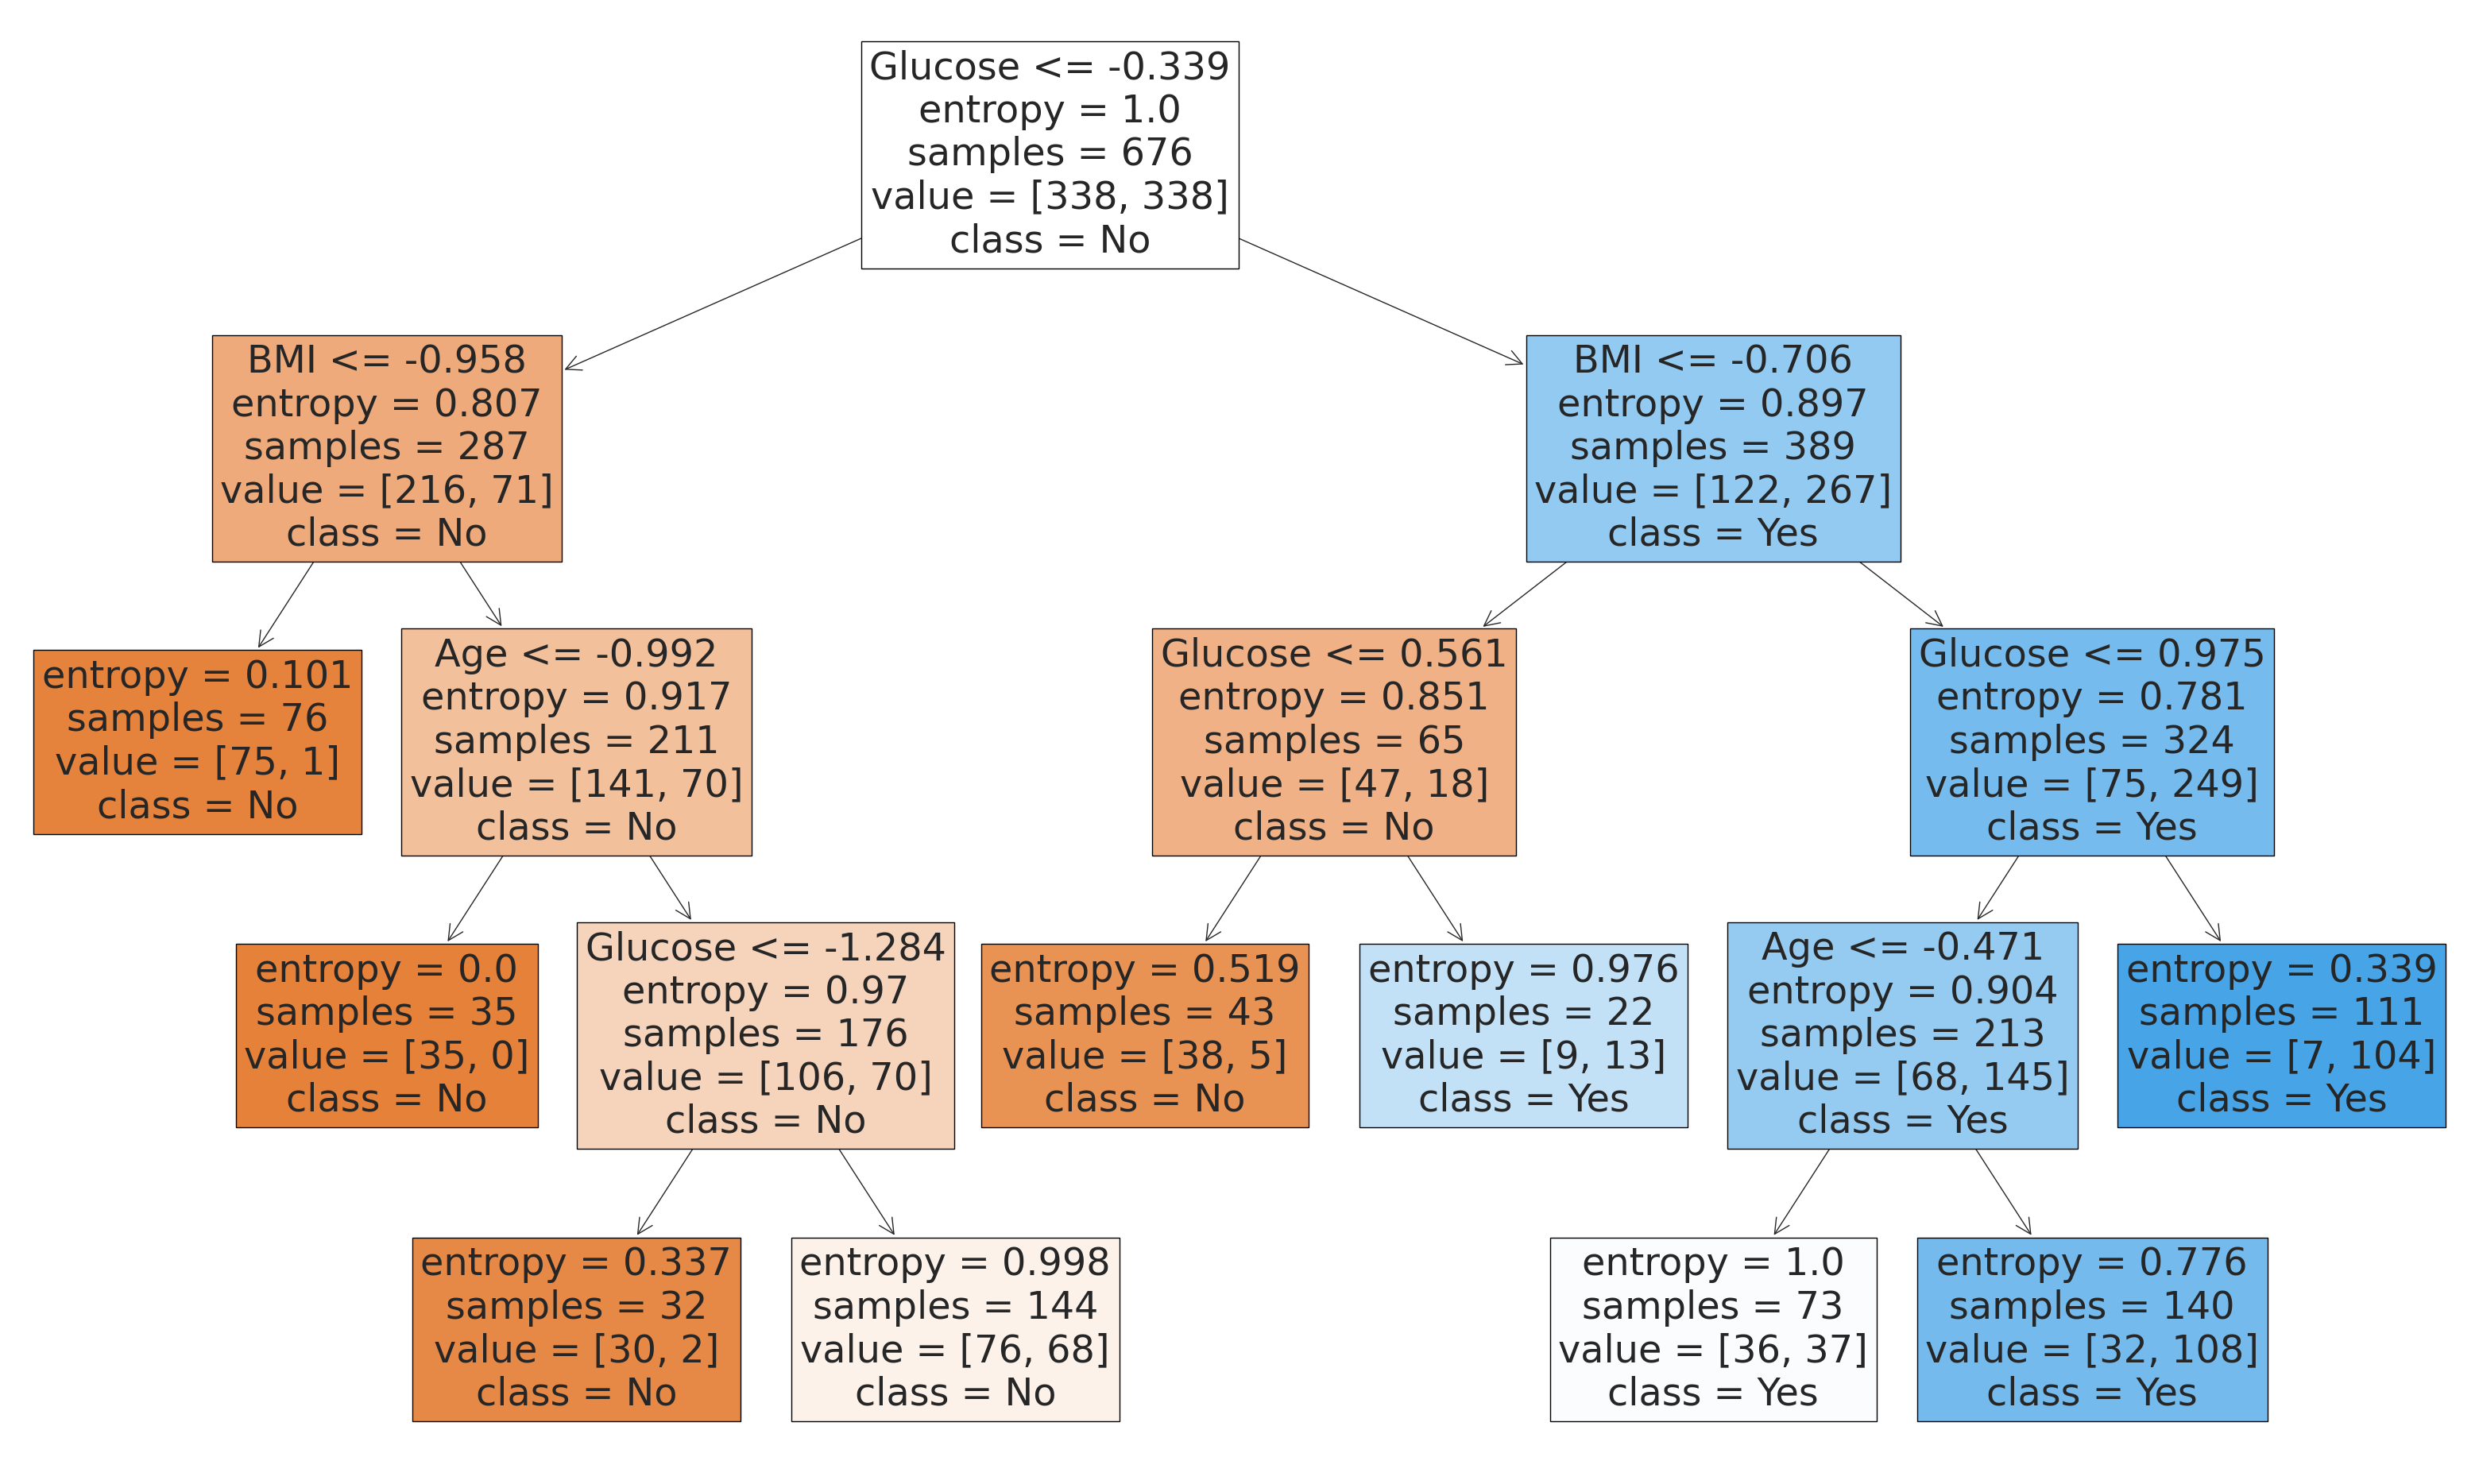

In [102]:
plt.figure(figsize=(40,24))
tree.plot_tree(clf_tree, feature_names=X.columns,  
                    class_names=['No','Yes'],
                    filled=True)
plt.show()

### importance

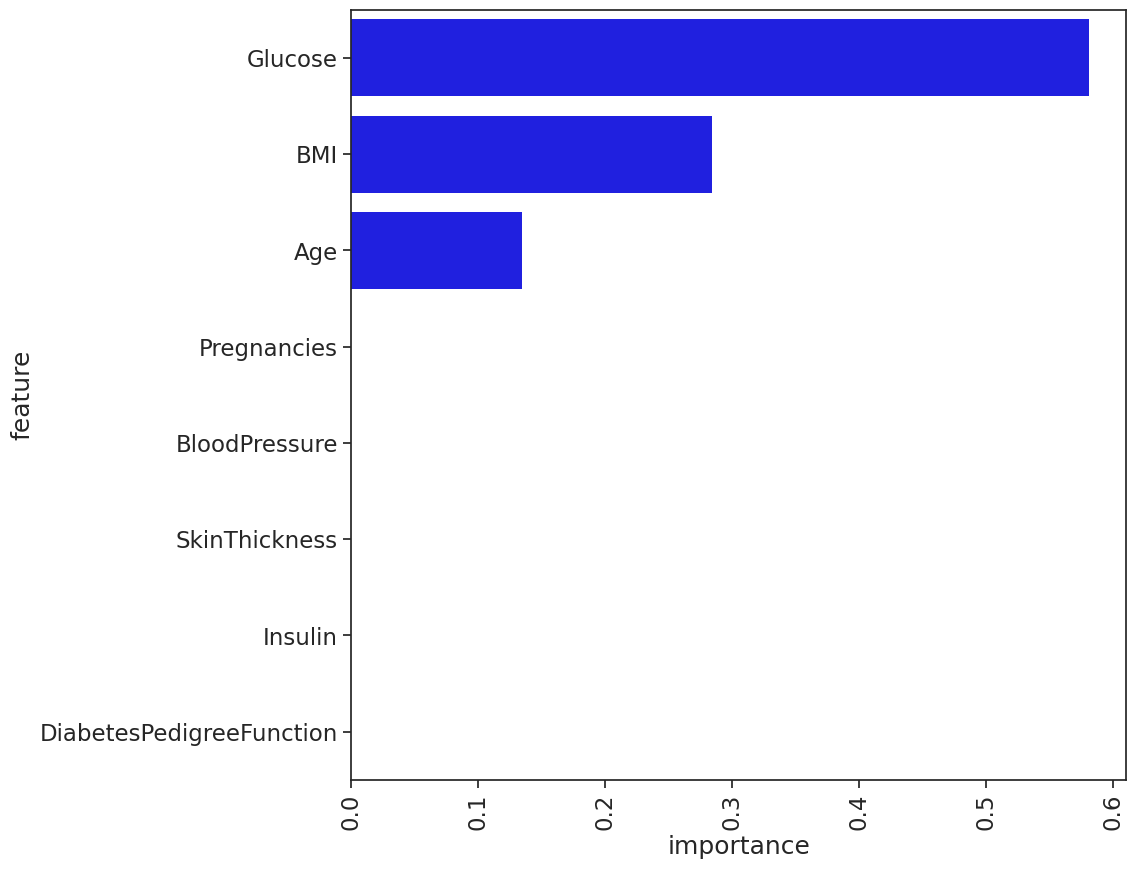

In [103]:
# Plot feature by importance in this model

plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': clf_tree.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False),
            color='b')
plt.xticks(rotation=90);

## Random Forest

In [104]:
rfc = RandomForestClassifier(random_state=1)
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]
    
}

In [105]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=10)
cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [106]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')
        
display(cv)

Best parameters are: {'max_depth': 16, 'n_estimators': 100}


0.747 + or -0.047 for the {'max_depth': 2, 'n_estimators': 5}
0.755 + or -0.034 for the {'max_depth': 2, 'n_estimators': 10}
0.747 + or -0.046 for the {'max_depth': 2, 'n_estimators': 50}
0.766 + or -0.032 for the {'max_depth': 2, 'n_estimators': 100}
0.763 + or -0.034 for the {'max_depth': 2, 'n_estimators': 250}
0.753 + or -0.039 for the {'max_depth': 4, 'n_estimators': 5}
0.762 + or -0.043 for the {'max_depth': 4, 'n_estimators': 10}
0.775 + or -0.042 for the {'max_depth': 4, 'n_estimators': 50}
0.78 + or -0.045 for the {'max_depth': 4, 'n_estimators': 100}
0.778 + or -0.049 for the {'max_depth': 4, 'n_estimators': 250}
0.762 + or -0.071 for the {'max_depth': 8, 'n_estimators': 5}
0.787 + or -0.068 for the {'max_depth': 8, 'n_estimators': 10}
0.801 + or -0.064 for the {'max_depth': 8, 'n_estimators': 50}
0.806 + or -0.062 for the {'max_depth': 8, 'n_estimators': 100}
0.8 + or -0.061 for the {'max_depth': 8, 'n_estimators'

In [112]:
rfc = RandomForestClassifier(n_estimators = cv.best_params_['n_estimators'], max_depth = cv.best_params_['max_depth'], random_state=1).fit(X_train, y_train)

In [113]:
# training acc...
predictions = rfc.predict(X_train)
y_pred = [ 1 if x > 0.5 else 0 for x in predictions]
cm = confusion_matrix(y_train, y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )

print("AUC Score: ", roc_auc_score(y_train, y_pred) )

Accuracy:  1.0
Sensitivity:  1.0
Precision:  1.0
False Positive Rate:  0.0
AUC Score:  1.0


Accuracy:  0.7992125984251969
Sensitivity:  0.75
Precision:  0.711340206185567
False Positive Rate:  0.1728395061728395
AUC Score:  0.7885802469135802


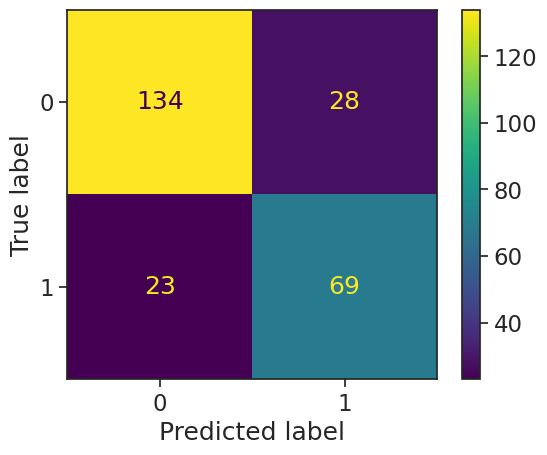

In [114]:
y_pred = rfc.predict(X_test)
y_pred_prob = rfc.predict_proba(X_test)

cm = confusion_matrix(y_test, y_pred)     

TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]

print("Accuracy: ", (TP+TN) / (TP+TN+FP+FN) )
print("Sensitivity: ",  TP / (FN + TP) )
print("Precision: ",  TP / (FP + TP) )
print("False Positive Rate: ",  FP / (FP + TN) )
print("AUC Score: ", roc_auc_score(y_test, y_pred) )
ConfusionMatrixDisplay(cm, display_labels=[0,1]).plot()

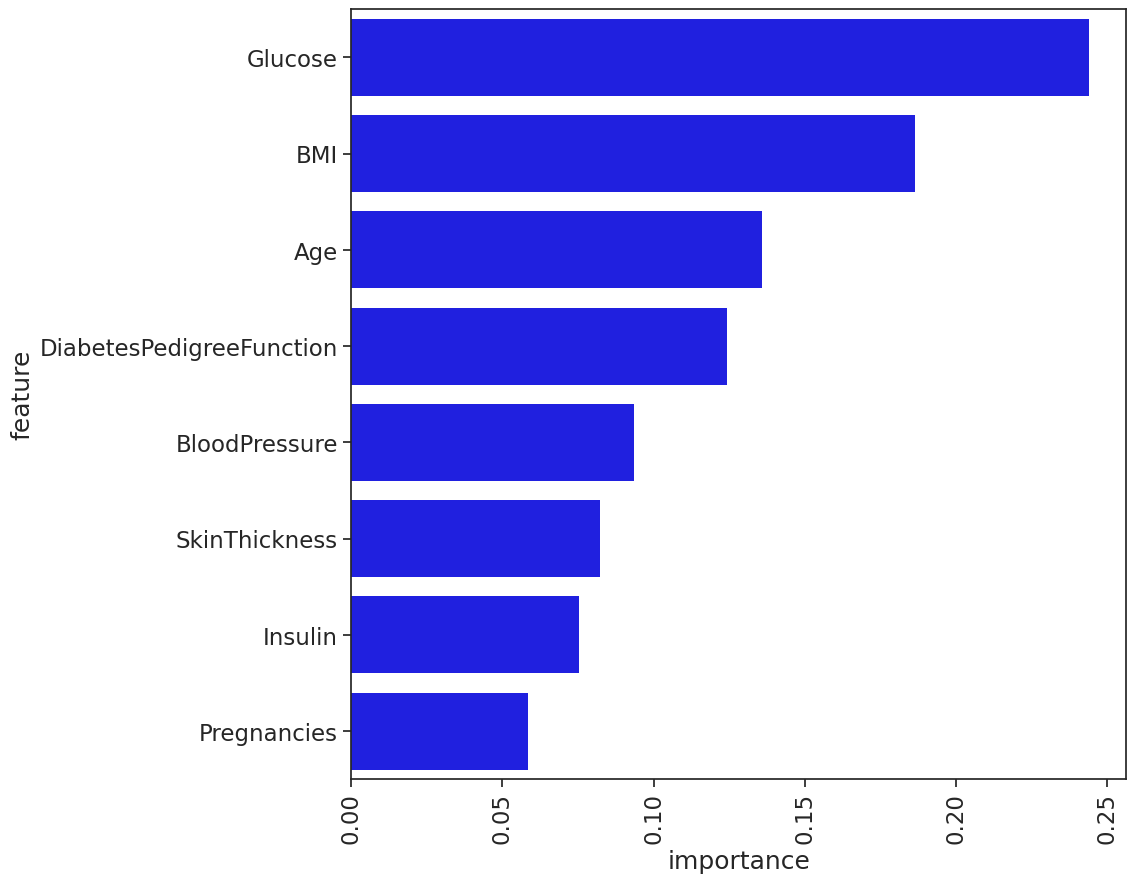

In [115]:
# Plot feature by importance in this model

plot_df = pd.DataFrame({'feature': X_train.columns, 'importance': rfc.feature_importances_})

plt.figure(figsize=(10,10))
sns.barplot(x='importance', y='feature', data=plot_df.sort_values('importance', ascending=False),
            color='b')
plt.xticks(rotation=90);